<a href="https://colab.research.google.com/github/Damurnath/Credit-Fraud-Detection-Project/blob/main/Final_Credit_Card_fraud_detection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection: A Crisp DM Approach

### Business Understanding

Credit Card Fraud Detection is a classic class-imbalance problem where the number of fraud transactions is much lesser than the number of legitimate transaction for any bank. Most of the approaches involve building model on such imbalanced data, and thus fails to produce results on real-time new data because of overfitting on training data and a bias towards the majoritarian class of legitimate transactions. Thus, we can see this as an anomaly detection problem.

1. What time does the Credit Card Frauds usually take place?
2. What are the general trends of amounts for Credit Card Fraud Transactions?
3. How do we balance the data to not let the model overfit on legitimate transactions?


In [ ]:

# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

import warnings
warnings.filterwarnings("ignore")


### Data Understanding
The Dataset we use is the Kaggle Credit Card Fraud Detection Dataset enlisted in the following link: <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud">Link</a>

- The Data has 32 features from V1-V28 which are unknown for confidentiality, TIme, Amount and Class
- The input features are V1-V28, Time and Amount
- The target variable is Class
- The Data does not have any missing values as evident from the below mentioned code, thus need not be handled
- The Data consists of all numerical features, and only the Target Variable Class is a categorical feature.
    - Class 0: Legitimate Transaction
    - Class 1: Fraud Transaction

In [ ]:
data = pd.read_csv('/content/credit_data.csv')

### Data Preparation

- The Data does not have any missing values and hence, need not be handled.
- The Data has only Target Variable Class as the categorical variable.
- Remaining Features are numerical and need to be only standardized for comparison after balancing the dataset
- The mean of the amount of money in transactions is 88.34
- The standard deviation of amount of money in transactions is 250.12
- The time is distributed throughout the data equitably and hence, serves as an independent feature
- It is best to not remove or drop any data or features in this case and try to tune the model assuming them as independent features initially

In [ ]:
pd.options.display.max_columns = None

**1 . Display Top 5 Rows of The Dataset**

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


**2 . Check Last 5 Rows of the Dataset**

In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
11678,19921,1.208802,-0.401943,0.901086,-0.697416,-1.014073,-0.281932,-0.828187,0.108108,3.018142,-1.257041,1.740809,-1.713229,0.584523,1.661930,-0.031389,-0.130184,0.272324,1.188983,0.771248,-0.188455,-0.137886,-0.007707,-0.075264,-0.065906,0.454008,-0.719787,0.054139,0.015084,11.85,0.0
11679,19924,-1.723814,1.389327,1.411353,-0.716019,-1.561864,1.505156,-2.024937,-5.393713,2.156363,-0.640814,1.482841,-1.949353,0.339440,1.651546,-1.067765,1.032548,0.375925,0.902172,-0.632374,-1.479663,5.161661,-1.997550,-0.202928,-0.040939,1.221328,1.155446,0.334758,0.104672,155.38,0.0
11680,19926,1.192037,-0.357840,1.002156,-0.558666,-1.017703,-0.321732,-0.780201,0.062111,3.206257,-1.477684,0.612950,-2.047273,0.890082,1.453244,0.863259,-0.730914,0.905538,0.098295,-0.003346,-0.230029,-0.138692,0.082080,0.007441,0.018529,0.378177,-0.693956,0.077499,0.025269,8.35,0.0
11681,19927,-7.773912,4.249596,-5.985636,1.450199,-4.709726,-1.302327,-2.807678,4.890516,0.807323,0.576220,0.447925,-0.453904,1.192093,5.443027,-0.751683,1.154254,2.295184,1.053376,0.023567,-0.068674,0.104104,-0.188352,-0.302390,0.299249,-0.185131,-0.445921,0.143783,-0.061396,89.99,0.0
11682,19929,1.024814,-1.179948,1.702954,-0.833752,-1.598620,1.270610,-1.786000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**3 . Find Shape of Our Dataset (Number of Rows and Number of Columns )**

In [ ]:
data.shape

(11683, 31)

In [ ]:
print ("Number of Rows", data.shape[0])
print ("Number of Columns", data.shape[1])

Number of Rows 11683
Number of Columns 31


**Get Information About Our Dataset Like Total Number of Rows,Total Number of Columns , Datatypes of Each Column and Memory Requirement**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11683 entries, 0 to 11682
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11683 non-null  int64  
 1   V1      11683 non-null  float64
 2   V2      11683 non-null  float64
 3   V3      11683 non-null  float64
 4   V4      11683 non-null  float64
 5   V5      11683 non-null  float64
 6   V6      11683 non-null  float64
 7   V7      11683 non-null  float64
 8   V8      11682 non-null  float64
 9   V9      11682 non-null  float64
 10  V10     11682 non-null  float64
 11  V11     11682 non-null  float64
 12  V12     11682 non-null  float64
 13  V13     11682 non-null  float64
 14  V14     11682 non-null  float64
 15  V15     11682 non-null  float64
 16  V16     11682 non-null  float64
 17  V17     11682 non-null  float64
 18  V18     11682 non-null  float64
 19  V19     11682 non-null  float64
 20  V20     11682 non-null  float64
 21  V21     11682 non-null  float64
 22

**5.Check Null Values In The Dataset**

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.483487,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.334222,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.758162,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.338121,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.040323,0.0


In [ ]:
data = data.drop(['Time'],axis=1)

In [ ]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.483487,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.334222,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.758162,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.338121,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.040323,0.0


In [ ]:
data.shape

(11683, 30)

In [ ]:
data.duplicated().any()

True

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(11412, 30)

In [ ]:
87796-85775

2021

**6.Not Handling Imbalanced**

In [ ]:
data['Class'].value_counts()

0.0    11362
1.0       49
Name: Class, dtype: int64

In [ ]:
import seaborn as sns

<Axes: ylabel='count'>

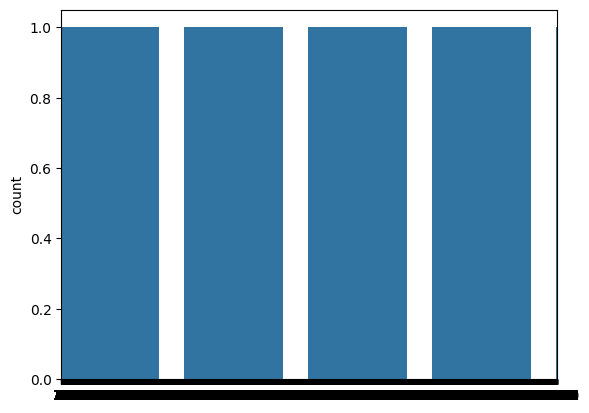

In [ ]:
sns.countplot(data['Class'])

**7.Store Feature Matrix In X And Response (Target) In Vector Y**

In [ ]:
X = data.drop('Class', axis=1)
Y = data['Class']

**8. Splitting The Dataset Into The Training Set and Test Set**

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , Y ,test_size=0.20,random_state=42)

**9. Handling Imbalanced Dataset**

In [ ]:
# Undersampling
# Oversampling

**Undersampling**

In [ ]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [ ]:
normal.shape

(11362, 30)

In [ ]:
fraud.shape

(49, 30)

In [ ]:
normal_sample=normal.sample(n=49)

In [ ]:
normal_sample.shape

(49, 30)

In [ ]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [ ]:
new_data['Class'].value_counts()

0.0    49
1.0    49
Name: Class, dtype: int64

In [ ]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.111712,0.215379,0.355265,1.014603,-0.145608,-0.284154,0.060931,0.037710,-0.289567,0.133068,1.700817,1.005092,-0.186638,0.639449,0.463430,-0.102139,-0.321249,-0.162595,-0.521270,-0.140307,0.129749,0.378383,-0.070872,0.236140,0.549833,-0.330397,0.023216,0.011639,-0.232154,0.0
1,1.338666,-0.181122,-0.852133,-1.036341,1.812085,3.282545,-0.877328,0.751039,1.543515,-0.524556,0.952962,-2.441501,1.752966,1.700030,0.698847,0.701934,-0.132903,0.296060,0.196881,0.020520,-0.336403,-0.862461,0.071346,0.993404,0.254231,0.881155,-0.095219,-0.003462,-0.327821,0.0
2,-0.424142,0.573811,1.269983,-0.710872,-0.209752,-0.619515,0.358978,-0.120666,1.649967,-0.827596,1.774855,-1.570224,1.190869,1.260290,-2.561772,-0.106091,0.399225,0.091749,-0.190431,-0.282248,0.014325,0.382676,0.066121,0.557020,-1.166626,0.661145,-0.148907,0.205632,-0.257365,0.0
3,-0.160626,-0.064459,2.531072,-1.328268,-0.970430,0.185030,-0.380184,0.078119,1.775956,-1.242315,-0.364954,0.435457,0.039502,-0.760588,1.701604,-1.233417,0.497776,0.194700,1.430685,0.130322,0.262124,1.340696,-0.253860,0.178601,-0.491121,0.244972,0.074829,-0.069924,-0.349137,0.0
4,-2.259405,1.893739,1.268691,1.242429,-0.240721,-0.137972,0.633847,-0.181362,2.678276,1.832361,0.551390,-3.472668,-0.712834,1.102003,-0.086397,-1.489424,1.405507,-0.411340,0.330364,0.518226,-0.480429,-0.148863,-0.085370,0.276469,0.244933,-0.318108,-0.159793,-0.132049,-0.242951,0.0


In [ ]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

**10. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred1 = log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred1)

0.95

In [ ]:
accuracy_score(y_test,y_pred1)

0.95

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
precision_score(y_test,y_pred1)

1.0

In [ ]:
precision_score(y_test,y_pred1)

1.0

In [ ]:
recall_score(y_test,y_pred1)

0.875

In [ ]:
recall_score(y_test,y_pred1)

0.875

In [ ]:
f1_score(y_test,y_pred1)

0.9333333333333333

In [ ]:
f1_score(y_test,y_pred1)

0.9333333333333333

**11. Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred2 = dt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.95

In [ ]:
precision_score(y_test,y_pred2)

1.0

In [ ]:
recall_score(y_test,y_pred2)

0.875

In [ ]:
f1_score(y_test,y_pred2)

0.9333333333333333

**12. Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred3 = rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.95

In [ ]:
precision_score(y_test,y_pred3)

1.0

In [ ]:
recall_score(y_test,y_pred3)

0.875

In [ ]:
f1_score(y_test,y_pred3)

0.9333333333333333

In [ ]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [ ]:
final_data

,Models,ACC
0,LR,95.0
1,DT,95.0
2,RF,95.0


**Oversampling**

In [ ]:
X = data.drop('Class',axis=1)
y = data['Class']

In [ ]:
X.shape

(11412, 29)

In [ ]:
y.shape

(11412,)

**10. Logistic Regression**

In [ ]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred1 = log.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred1)

0.95

In [ ]:
precision_score(y_test,y_pred1)

1.0

In [ ]:

recall_score(y_test,y_pred1)

0.875

In [ ]:
f1_score(y_test,y_pred1)

0.9333333333333333

**12. Random Forest Classifier**


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred3 = rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.95

In [ ]:
precision_score(y_test,y_pred3)

1.0

In [ ]:

recall_score(y_test,y_pred3)

0.875

In [ ]:
f1_score(y_test,y_pred3)

0.9333333333333333

In [ ]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [ ]:
final_data

,Models,ACC
0,LR,95.0
1,DT,95.0
2,RF,95.0


**Save The Model**

In [ ]:
# Read Data into a Dataframe
df = pd.read_csv('/content/credit_data.csv')

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14590,25807,-0.769852,2.704375,-2.083145,1.018899,1.083598,-1.255315,1.242032,-0.525902,1.466585,2.055627,3.118883,-0.477144,-1.304339,-4.296483,0.921619,0.301072,2.598414,1.394970,-0.786141,1.280336,-0.448296,-0.071608,0.118632,-0.180557,-0.288828,-0.448297,0.608821,-0.186236,0.89,0.0
14591,25808,-0.897475,0.963371,0.997351,0.329928,0.998766,-1.287190,0.713085,0.019353,-0.859152,-1.144554,1.694987,0.191113,-0.633262,-1.175256,-0.194140,0.867302,0.517309,1.178571,-0.885454,-0.020682,0.118559,0.159961,-0.234309,0.381128,0.193193,-0.511092,0.092647,0.150261,1.00,0.0
14592,25809,-0.377066,0.984515,0.988848,-0.261443,0.563332,0.197124,0.489867,0.281753,-0.543286,-0.373187,1.015985,0.226542,-0.318792,-0.155705,0.545137,0.508486,-0.188241,0.187780,0.102294,0.086154,-0.234987,-0.625894,-0.077312,-0.732204,-0.187063,0.128292,0.254469,0.076702,3.57,0.0
14593,25810,-0.353184,0.311241,1.586426,-1.515835,-0.636334,-0.836015,0.441214,-0.188933,1.218595,-1.805706,-0.323641,1.076636,0.657411,-0.180406,1.330492,-2.343324,1.037956,0.106362,3.303447,0.289073,0.049963,0.562606,-0.406689,0.494957,0.647956,-0.388286,0.159966,0.085009,24.95,0.0


In [ ]:
# Describe Data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14594.000000,14594.000000,14594.000000,14594.000000,14594.000000,14594.000000,14594.000000,14594.000000,14594.000000,14594.000000
mean,10789.397670,-0.235869,0.281890,0.836157,0.301529,-0.120216,0.127655,-0.156335,-0.013457,0.958179,-0.316893,0.851377,-1.524929,0.984729,0.816371,-0.178786,-0.037220,0.406839,-0.005293,-0.088218,0.024289,-0.067785,-0.159067,-0.034452,0.012024,0.117077,0.035892,0.013886,0.003275,64.167390,0.004180
std,8185.099006,1.733224,1.400483,1.580158,1.496743,1.298186,1.323321,1.245896,1.261783,1.225899,1.246632,1.195511,1.545791,1.165678,1.343691,0.978232,0.969987,1.236274,0.851932,0.827387,0.589620,0.868051,0.621986,0.495948,0.587172,0.429212,0.554197,0.398324,0.254092,177.256238,0.064518
min,0.000000,-27.670569,-34.607649,-24.667741,-5.172595,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,-14.166795,-2.767470,-17.769143,-3.389510,-19.214325,-4.152532,-12.227189,-18.587366,-8.061208,-4.932733,-13.276034,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,3120.000000,-0.970401,-0.287015,0.398237,-0.625120,-0.715802,-0.626724,-0.613229,-0.182259,0.236955,-0.773523,0.055259,-2.458740,0.166047,0.226917,-0.755632,-0.520481,-0.067731,-0.440866,-0.576749,-0.162432,-0.272055,-0.552828,-0.172879,-0.339159,-0.137046,-0.369383,-0.075588,-0.014270,5.490000,0.000000
50%,9765.000000,-0.318075,0.251920,0.954945,0.224760,-0.189767,-0.150116,-0.107062,0.017199,0.941903,-0.374178,0.789189,-1.839904,1.074486,1.095542,-0.040154,0.034280,0.402484,0.048296,-0.089724,-0.037444,-0.131175,-0.123806,-0.044647,0.060358,0.156752,-0.033930,-0.000373,0.016598,15.900000,0.000000
75%,18792.500000,1.162615,0.884715,1.598016,1.190561,0.350648,0.506798,0.421533,0.265329,1.628664,0.136263,1.643980,-0.318040,1.850401,1.550646,0.496302,0.534921,0.887379,0.490701,0.430031,0.139598,0.020955,0.228997,0.071106,0.393153,0.393032,0.369598,0.098414,0.073539,52.915000,0.000000
max,25810.000000,1.960497,10.819665,4.101716,11.927512,34.099309,21.393069,34.303177,11.580797,10.392889,12.259949,12.018913,3.774837,4.465413,7.692209,3.635042,4.816252,9.253526,4.295648,4.555359,8.012574,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
def countplot_data(data, feature):
    '''
        Method to compute countplot of given dataframe
        Parameters:
            data(pd.Dataframe): Input Dataframe
            feature(str): Feature in Dataframe
    '''
    plt.figure(figsize=(10,10))
    sns.countplot(x=feature, data=data)
    plt.show()

def pairplot_data_grid(data, feature1, feature2, target):
    '''
        Method to construct pairplot of the given feature wrt data
        Parameters:
            data(pd.DataFrame): Input Dataframe
            feature1(str): First Feature for Pair Plot
            feature2(str): Second Feature for Pair Plot
            target: Target or Label (y)
    '''

    sns.FacetGrid(data, hue=target).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()

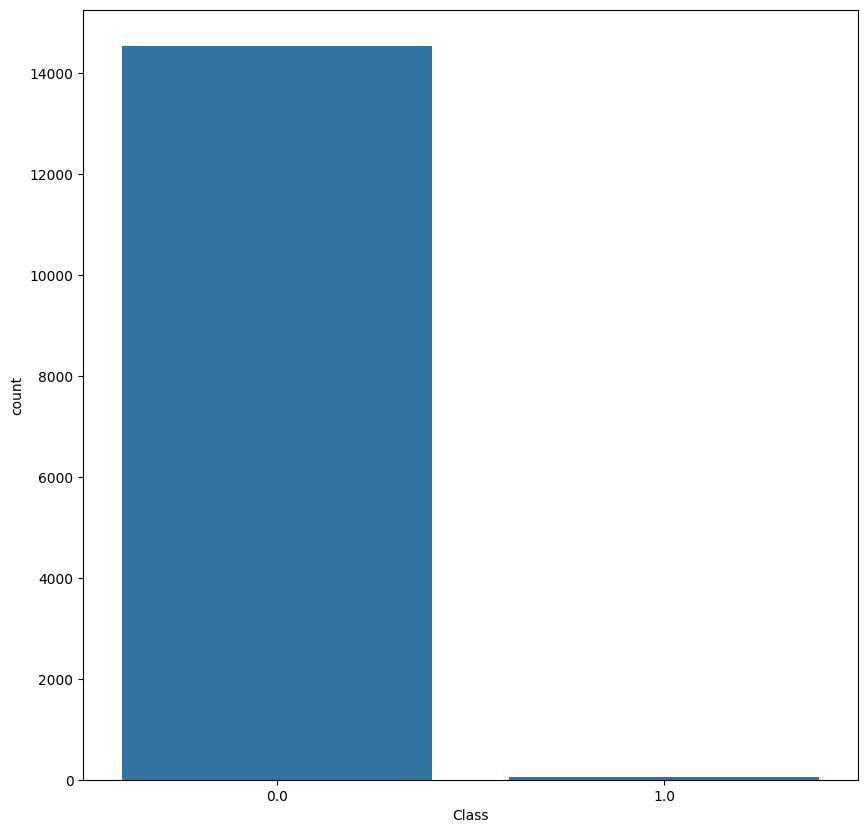

In [ ]:
countplot_data(df, df.Class)

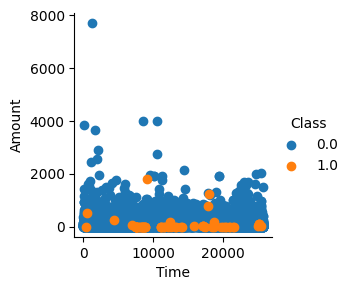

In [ ]:
pairplot_data_grid(df, "Time", "Amount", "Class")

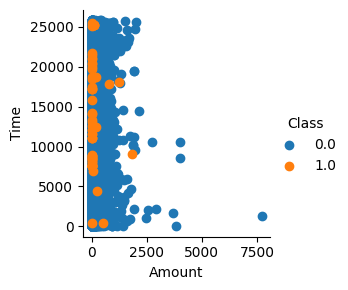

In [ ]:
pairplot_data_grid(df, "Amount", "Time", "Class")

In [105]:
amount_more = 0
amount_less = 0
for i in range(df.shape[0]):
    if(df.iloc[i]["Amount"] < 2500):
        amount_less += 1
    else:
        amount_more += 1
print(amount_more)
print(amount_less)


9
14586


In [106]:
percentage_less = (amount_less/df.shape[0])*100
percentage_less

99.93833504624871

Hence, we observe that the 99.93% of transactions amount to less than 2500.
Let us see how many of these are fraud and others legitimate

In [107]:
fraud = 0
legitimate = 1
for i in range(df.shape[0]):
    if(df.iloc[i]["Amount"]<2500):
        if(df.iloc[i]["Class"] == 0):
            legitimate += 1
        else:
            fraud+=1
print(fraud)
print(legitimate)

61
14526


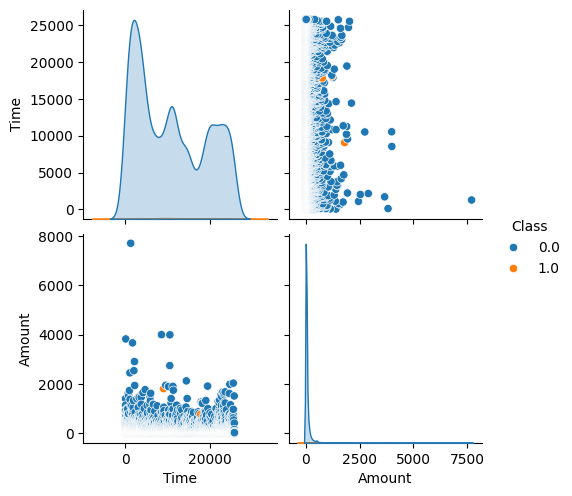

In [108]:
df = df[["Time", "Amount", "Class"]]
sns.pairplot(df, hue="Class")
plt.show()

In [109]:
df.Class.value_counts()

0.0    14533
1.0       61
Name: Class, dtype: int64

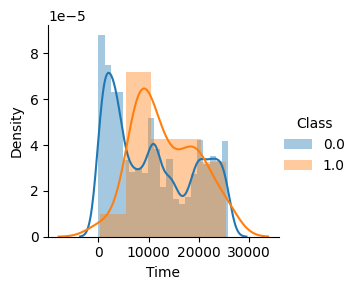

In [110]:
sns.FacetGrid(df, hue="Class").map(sns.distplot,"Time").add_legend()
plt.show()

In [112]:
fraud = 0
legitimate = 1
for i in range(df.shape[0]):
    if(df.iloc[i]["Amount"]<2500):
        if(df.iloc[i]["Class"] == 0):
            legitimate += 1
        else:
            fraud+=1
print(fraud)
print(legitimate)

61
14526


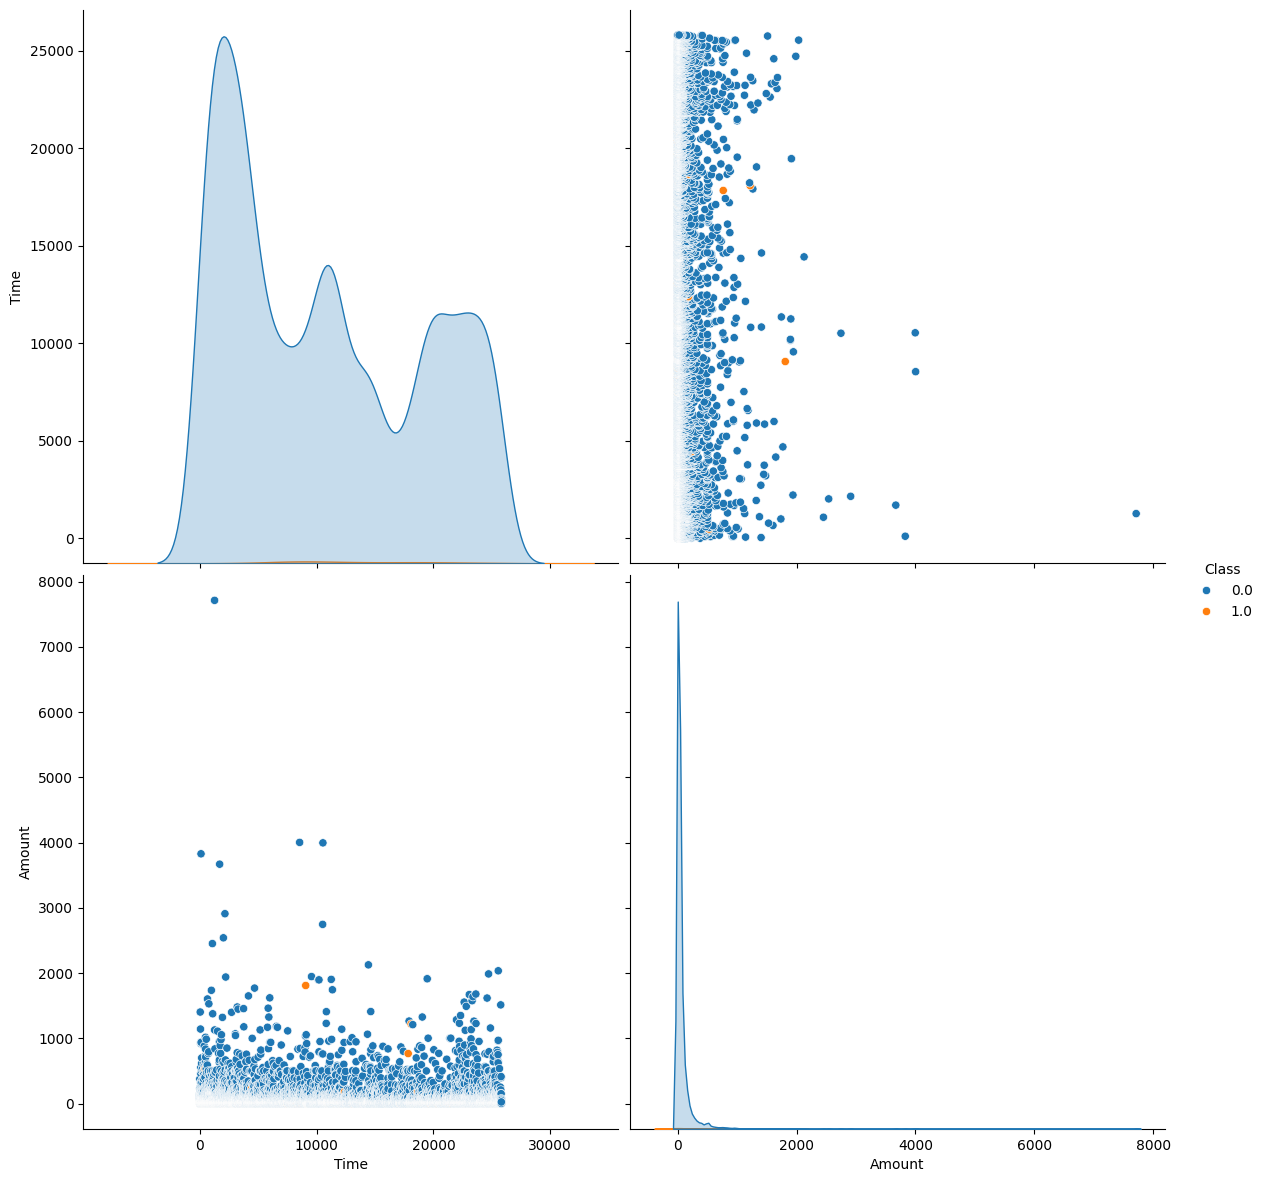

In [114]:
df = df[["Time", "Amount", "Class"]]
sns.pairplot(df, hue="Class", size=6)
plt.show()

### Modelling
- Study the Feature Correlations of the given data
- Plot a Heatmap
- Run GridSearch on the Data
- Fine Tune the Classifiers
- Create Pipelines for evaluation

<Axes: >

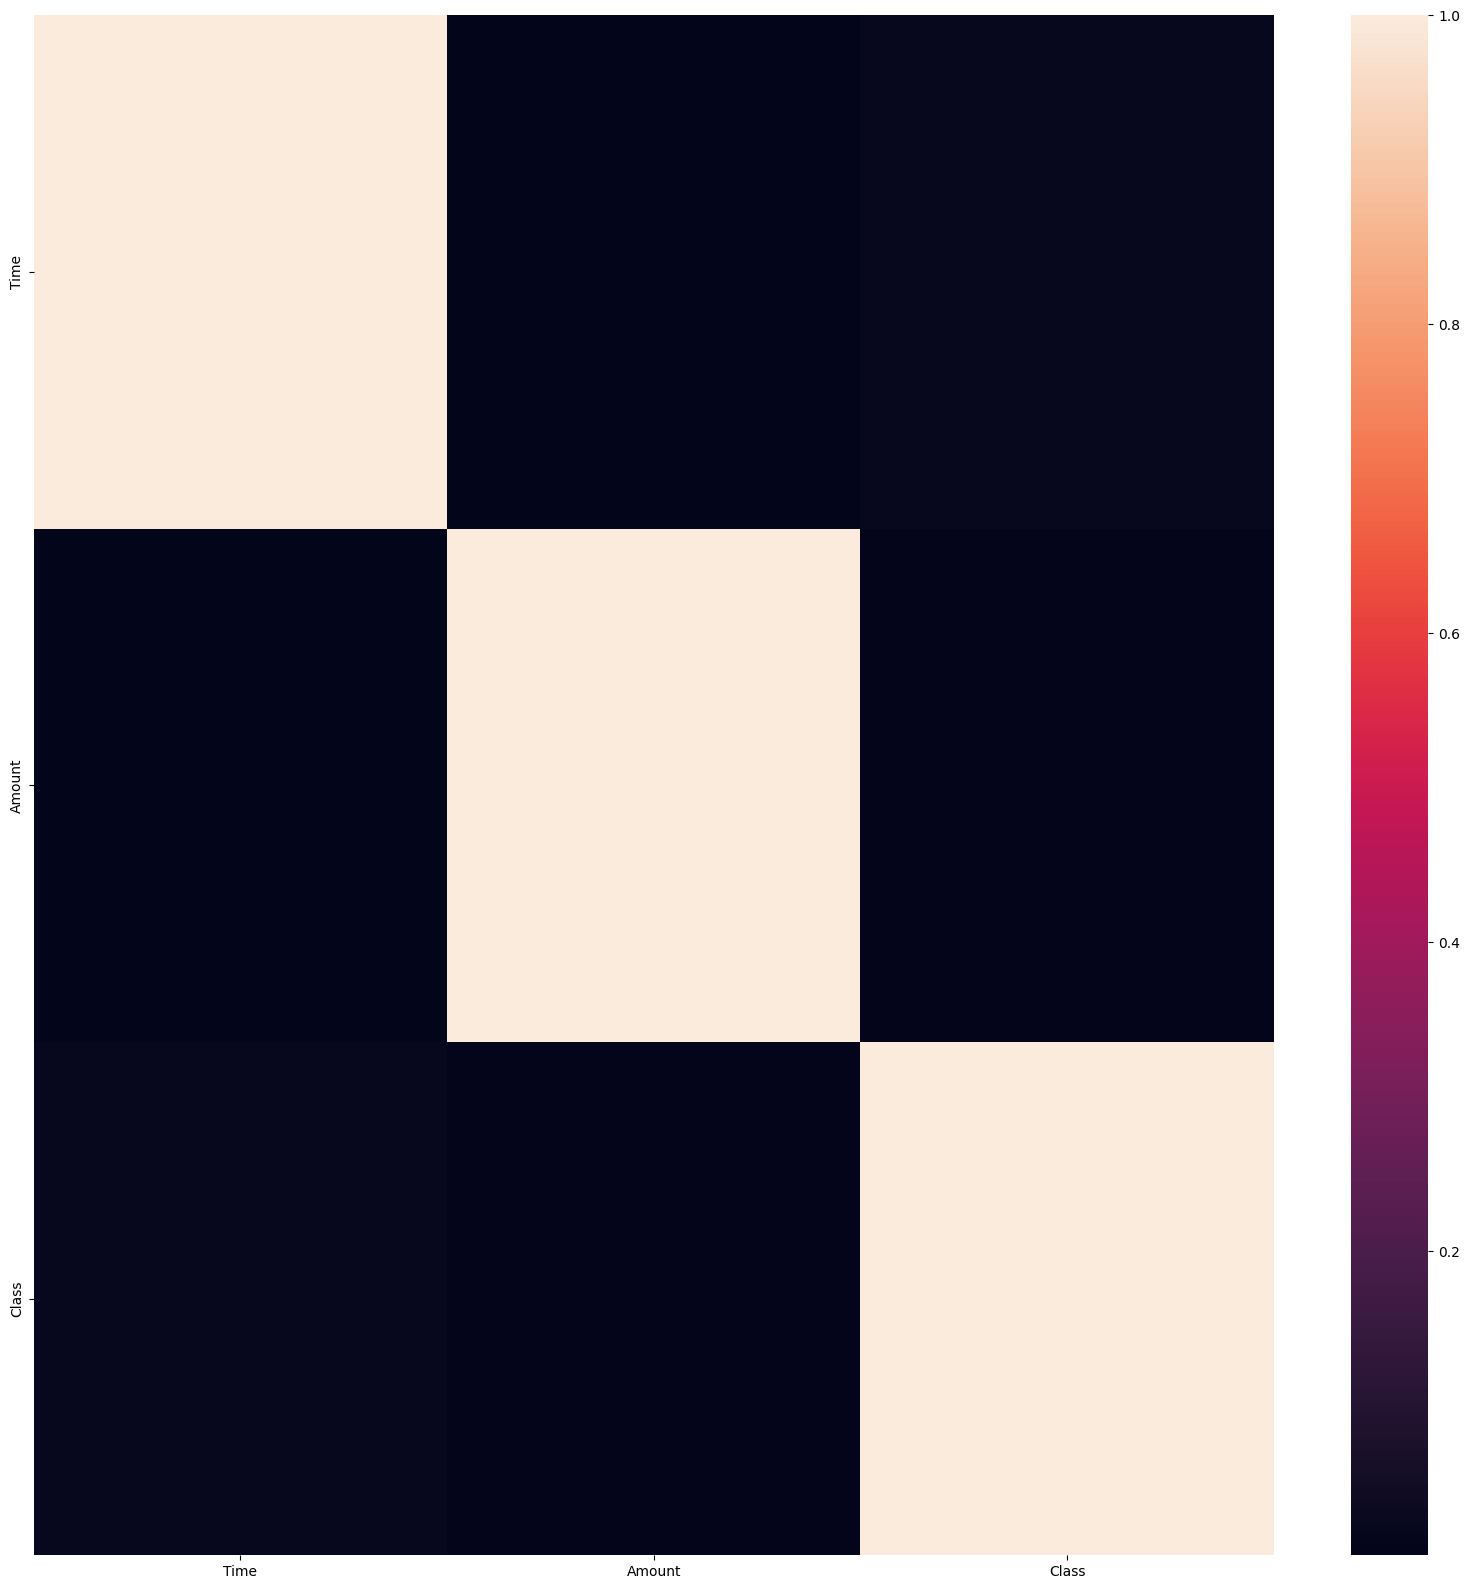

In [115]:
plt.figure(figsize=(20,20))
df_corr = df.corr()
sns.heatmap(df_corr)

### How will you balance the fraud and legitimate transactions in data?

In [120]:
# Use Synthetic Minority Oversampling
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [121]:
from sklearn.feature_selection import mutual_info_classif
mutual_infos = pd.Series(data=mutual_info_classif(X_res, y_res, discrete_features=False, random_state=1), index=X_train.columns)

In [122]:
mutual_infos.sort_values(ascending=False)

V14       0.560665
V4        0.548358
V12       0.510195
V17       0.454435
V3        0.448396
V11       0.442687
V10       0.441220
V2        0.421993
V6        0.402927
V16       0.377130
V21       0.376132
V7        0.373070
V27       0.346417
V9        0.343404
V23       0.295618
Amount    0.267061
V19       0.231567
V18       0.229744
V24       0.204343
V28       0.180650
V26       0.179345
V25       0.169893
V20       0.151427
V1        0.131426
V8        0.124959
V5        0.096011
V13       0.071010
V15       0.037661
V22       0.000000
dtype: float64

<Axes: ylabel='count'>

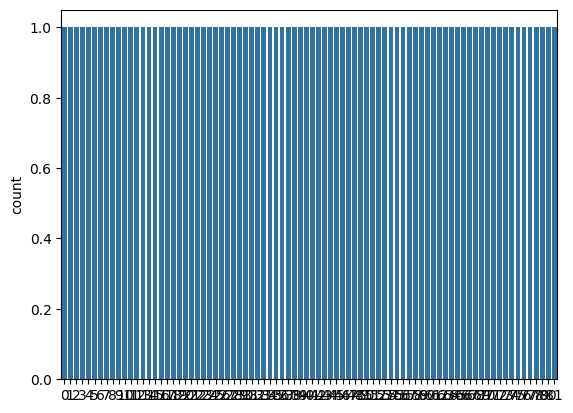

In [123]:
sns.countplot(y_res)

Hence, we can say that the most correlated features after resolving class imbalance using Synthetic Minority Oversampling are V14, V10, V4, V12 and V17.

### Evaluation

We make use of AUC-ROC Score, Classification Report, Accuracy and F1-Score to evaluate the performance of the classifiers

In [124]:
# Evaluation of Classifiers
def grid_eval(grid_clf):
    """
        Method to Compute the best score and parameters computed by grid search
        Parameter:
            grid_clf: The Grid Search Classifier
    """
    print("Best Score", grid_clf.best_score_)
    print("Best Parameter", grid_clf.best_params_)

def evaluation(y_test, grid_clf, X_test):
    """
        Method to compute the following:
            1. Classification Report
            2. F1-score
            3. AUC-ROC score
            4. Accuracy
        Parameters:
            y_test: The target variable test set
            grid_clf: Grid classifier selected
            X_test: Input Feature Test Set
    """
    y_pred = grid_clf.predict(X_test)
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, y_pred))

    print('AUC-ROC')
    print(roc_auc_score(y_test, y_pred))

    print('F1-Score')
    print(f1_score(y_test, y_pred))

    print('Accuracy')
    print(accuracy_score(y_test, y_pred))

In [125]:
# The parameters of each classifier are different
# Hence, we do not make use of a single method and this is not to violate DRY Principles
# We set pipelines for each classifier unique with parameters
param_grid_sgd = [{
    'model__loss': ['log'],
    'model__penalty': ['l1', 'l2'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20)
}, {
    'model__loss': ['hinge'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20),
    'model__class_weight': [None, 'balanced']
}]

pipeline_sgd = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

MCC_scorer = make_scorer(matthews_corrcoef)
grid_sgd = GridSearchCV(estimator=pipeline_sgd, param_grid=param_grid_sgd, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)


grid_sgd.fit(X_res, y_res)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler(copy=False)),
                                       ('model',
                                        SGDClassifier(random_state=1,
                                                      warm_start=True))]),
             n_jobs=-1,
             param_grid=[{'model__alpha': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00,...
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                          'model__class_weight': [None, 'balanced'],
                          'model__loss': ['hinge']}],
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [127]:
grid_eval(grid_sgd)

Best Score 0.9541611985154171
Best Parameter {'model__alpha': 0.004281332398719396, 'model__class_weight': None, 'model__loss': 'hinge'}


In [128]:
evaluation(y_test, grid_sgd, X_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        12
         1.0       1.00      0.88      0.93         8

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20

AUC-ROC
0.9375
F1-Score
0.9333333333333333
Accuracy
0.95


In [129]:
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])
param_grid_rf = {'model__n_estimators': [75]}
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_rf.fit(X_res, y_res)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1, param_grid={'model__n_estimators': [75]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [130]:
grid_eval(grid_rf)

Best Score 0.9055446192530565
Best Parameter {'model__n_estimators': 75}


In [131]:
evaluation(y_test, grid_rf, X_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        12
         1.0       1.00      0.88      0.93         8

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20

AUC-ROC
0.9375
F1-Score
0.9333333333333333
Accuracy
0.95


In [132]:
pipeline_lr = Pipeline([
    ('model', LogisticRegression(random_state=1))
])
param_grid_lr = {'model__penalty': ['l2'],
                 'model__class_weight': [None, 'balanced']}
grid_lr = GridSearchCV(estimator=pipeline_lr, param_grid=param_grid_lr, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_lr.fit(X_res, y_res)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        LogisticRegression(random_state=1))]),
             n_jobs=-1,
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__penalty': ['l2']},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [133]:
grid_eval(grid_lr)

Best Score 0.9069280399906958
Best Parameter {'model__class_weight': None, 'model__penalty': 'l2'}


In [134]:
evaluation(y_test, grid_lr, X_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92        12
         1.0       1.00      0.75      0.86         8

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20

AUC-ROC
0.875
F1-Score
0.8571428571428571
Accuracy
0.9


In [135]:
pipeline_knn = Pipeline([
    ('model', KNeighborsClassifier(n_neighbors=5))
])
param_grid_knn = {'model__p': [2]}
grid_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_knn.fit(X_res, y_res)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'model__p': [2]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [136]:
grid_eval(grid_knn)

Best Score 0.8654483028728984
Best Parameter {'model__p': 2}


In [137]:
evaluation(y_test, grid_knn, X_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89        12
         1.0       1.00      0.62      0.77         8

    accuracy                           0.85        20
   macro avg       0.90      0.81      0.83        20
weighted avg       0.88      0.85      0.84        20

AUC-ROC
0.8125
F1-Score
0.7692307692307693
Accuracy
0.85


### Conclusion
- The SGD Classifier tuned with Grid Search with the best parameter being the Euclidean Distance (p=2) outperforms its counterparts to give a test accuracy of nearly 95.8% and a perfect F1-Score with minimal overfitting
- SMOTE overcomes overfitting by synthetically oversampling minority class labels and is successful to a great degree

### Summary
- All Fraud Transactions occur for an amount below 2500. Thus, the bank can infer clearly that the fraud committers try to commit frauds of smaller amounts to avoid suspicion.
- The fraud transactions are equitable distributed throughout time and there is no clear relationship of time with commiting of fraud.
- The number of fraud transactions are very few comparted to legitimate transactions and it has to be balanced in order for a fair comparison to prevent the model from overfitting.